### Task 3.1 Unsupervised Learning - Clustering

- Load dataset (food.csv)
  - Use `pandas.read_csv()`
- Preprocess data using z-transformation
  - Use `StandardScaler` from `sklearn.preprocessing`
- Apply KMeans clustering
  - Use `KMeans` from `sklearn.cluster`
  - Vary `k` from 2 to 5
  - Compute the **Silhouette coefficient** using `metrics.silhouette_score`
  - Select the best `k` based on the highest score
- Visualize final KMeans clustering using PCA
  - Use `PCA(n_components=2)` from `sklearn.decomposition`
  - Plot clusters using `matplotlib.pyplot.scatter()`
- Perform hierarchical clustering
  - Use `linkage()` from `scipy.cluster.hierarchy`
  - Plot dendrogram using `dendrogram()`
- Create a heatmap
  - Use `seaborn.heatmap()` for clustering of samples and variables
- Perform density-based clustering
  - Use `DBSCAN` from `sklearn.cluster`
- Update Git repository
  - Run `git add`, `git commit -m "Clustering analysis"`, `git push` in the terminal

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

data = pd.read_csv("./assets/food_2.csv")

In [30]:
data.rename(columns={'Unnamed: 0' : 'country'}, inplace=True)

country_names = data['country']
data = data.drop(columns='country')

scaler = StandardScaler()

standardized_data = scaler.fit_transform(data)

standardized_data = pd.DataFrame(standardized_data, columns=data.columns, index=country_names)

standardized_data.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


We can now continue with K-means as we have standardised data.

`k` describes the numer of clusters that will be formed.
`random_state` is set to a fixed integer so that the reproducability is given.

In [81]:
scores = {}

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(standardized_data)
    score = silhouette_score(standardized_data, labels)
    scores[k] = score

    print(f"Silhouette score for k={k}: {score:.4f}")

best_k = max(scores, key=scores.get)
print(f"\nBest k based on silhouette score: {best_k} with a score of {scores[best_k]:.4f}")



Silhouette score for k=2: 0.3271
Silhouette score for k=3: 0.3484
Silhouette score for k=4: 0.2003
Silhouette score for k=5: 0.1674

Best k based on silhouette score: 3 with a score of 0.3484


The Silhouette Score is value that evaluates the clustering quality.

1  = well-clustered
~0 = overlapping clusters
<0 = badly-clustered 

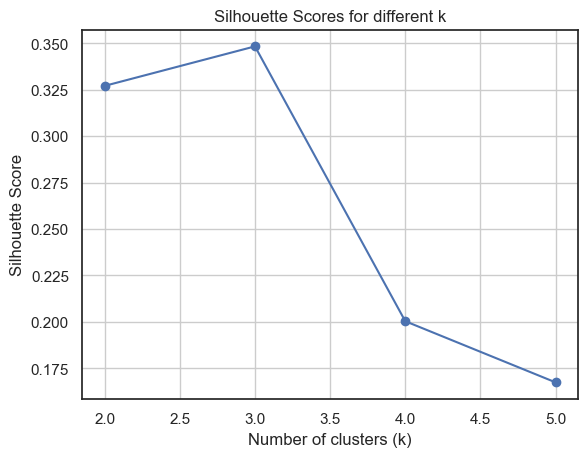

In [111]:
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different k")
plt.grid(True)
plt.show()

We use the PCA so that we can visualise the data.

In [107]:
kmeans = KMeans(n_clusters=best_k, random_state=0)
final_labels = kmeans.fit_predict(standardized_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_data)

In [84]:
reduced_data

array([[ 3.55723814, -1.66410153],
       [-1.45200587, -1.06270224],
       [-1.65547983,  0.16278449],
       [ 3.19870836, -1.32789455],
       [-0.37810388, -0.61509588],
       [-2.41404237,  0.29133192],
       [-1.45153787,  0.45958638],
       [-1.5961042 , -0.60829255],
       [-1.51866569,  0.80155997],
       [ 2.28588421,  1.02170143],
       [ 1.48749325, -0.83277665],
       [-2.71840037, -0.77945466],
       [ 1.5662092 ,  0.40721449],
       [-1.67529322, -0.9307968 ],
       [-0.994802  ,  0.8389795 ],
       [-0.12438256,  0.54270685],
       [ 1.74102993,  4.37737493],
       [ 2.81365985, -1.14185552],
       [ 1.33885786,  2.60617968],
       [-1.66741865, -0.21166087],
       [-0.93113082, -0.76654602],
       [-1.77115274, -0.09591736],
       [ 0.79873424, -0.11305431],
       [-2.13701166, -0.29983694],
       [ 3.69771671, -1.05943374]])

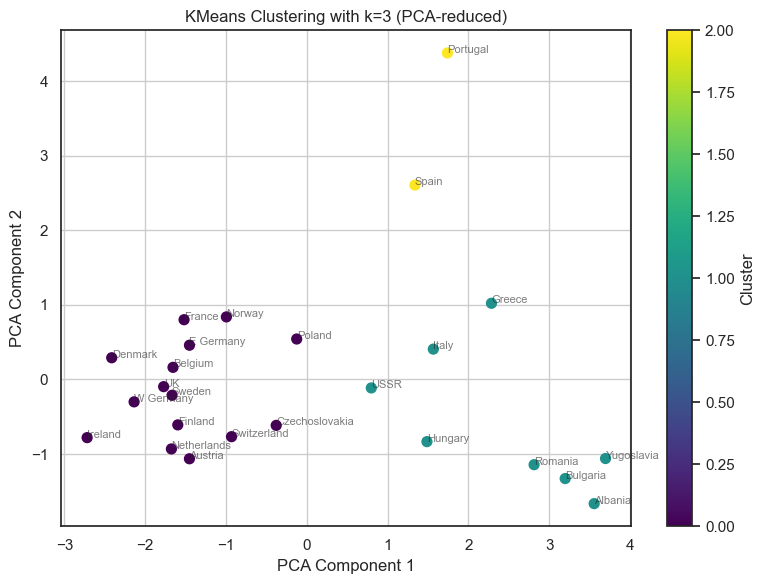

In [108]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    reduced_data[:, 0],  
    reduced_data[:, 1],  
    c=final_labels,      
    cmap='viridis',      
    s=50                 
)

for i, country in enumerate(standardized_data.index):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], country, fontsize=8, alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering with k={best_k} (PCA-reduced)")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Perform hierarchical clustering
linkage creates a matrix that describe how clusters are merged.

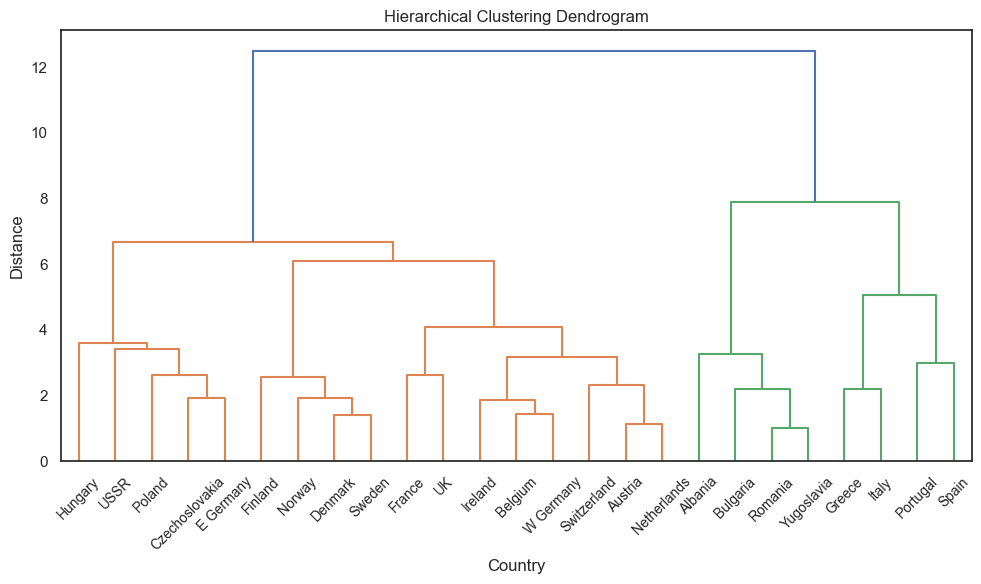

In [109]:
linked = linkage(standardized_data, method='ward')

plt.figure(figsize=(10, 6))

dendrogram(
    linked,
    labels=standardized_data.index.tolist(),  
    orientation='top',
    distance_sort='ascending',
    show_leaf_counts=True
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

#### Create a heatmap

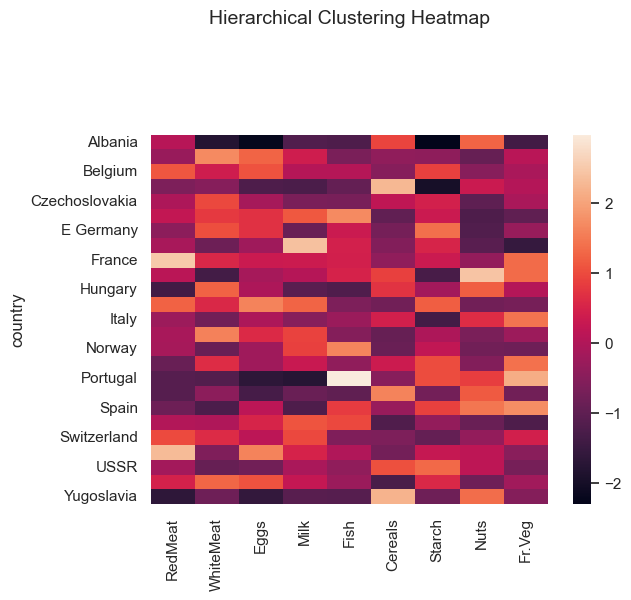

In [110]:
g = sns.heatmap(standardized_data)

plt.title("Hierarchical Clustering Heatmap", fontsize=14, pad=80)
plt.show()

#### Perform density-based clustering